In [21]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

In [22]:
import seaborn as sns

In [23]:
deaths = pd.read_feather('../data/pubg/deaths_sample.fth')

In [24]:
deaths.head(4)

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,UMP9,bigjj321,5.0,332478.2,533202.6,ERANGEL,2U4GBNA0YmmYVKQqfjTRvzroK1jWy0P_Ekt9jDJjdzJ8_g...,747,unbertakerP,3.0,330715.8,532682.2
1,Bluezone,None,NaN,NaN,NaN,ERANGEL,2U4GBNA0YmnpTzelHSxoLknOT8Wco_qaNyOFz53xi7X7Em...,1487,Your-Old-Iron,82.0,0.0,0.0
2,M16A4,StolenV91,24.0,520532.2,467115.6,ERANGEL,2U4GBNA0YmlVfjiMYDoLjs98iK0X1fFCQtmxh9XIAXWJ4l...,504,sasadezx,33.0,520822.9,467389.5
3,M416,LHYnana,11.0,467785.8,318166.1,ERANGEL,2U4GBNA0YmlTGucmurdMK2LklO0uiEBpLbx7EUw7n-emtn...,964,pokkerguy,NaN,468878.0,318632.4


# MATCHES IN SAMPLE

In [25]:
deaths.groupby('map')['match_id'].count()

map
ERANGEL    200000
MIRAMAR    200000
Name: match_id, dtype: int64

# Kills per user per match vs placement

In [34]:
kum = deaths.groupby(['match_id', 'killer_name']).agg({'killer_placement':'first', 
                                                                    'map': 'count'}).sort_values('map',ascending=False)

In [35]:
kum.columns = ['killer_placement', 'kills']

In [36]:
kum.head(5)

,,killer_placement,kills
match_id,killer_name,,
2U4GBNA0Yml8DHHj0gjSNaIRKJBGJ8boJs_Wd5QouEcqSKzQ1bCnTTiGGbTtpJD8,#unknown,4.0,9
2U4GBNA0YmlaiizyNo9quswlM8NL4rHku2SuRFBiYJ1NaoxYMgmXhnyZK0FtJe1_,#unknown,18.0,9
2U4GBNA0Yml74fmFma0471HqcIkEFOHt5JMAZGXHn_MOturixjiEINcNhL0_ukb2,#unknown,18.0,7
2U4GBNA0YmkUAoZTDqdGI_ihPaoMXV1WTKMKsVBwIqqk63xOzAZnceYsNAZT2A2C,#unknown,1.0,7
2U4GBNA0YmlxrIXrRU4efR7DCqCaRM7XlWeRJxfyyAtgD_ksoP8kArJF5lC3j4I2,#unknown,18.0,7


In [37]:
kum['killer_placement'].nunique()

99

In [40]:
kum['kills'].min()

1

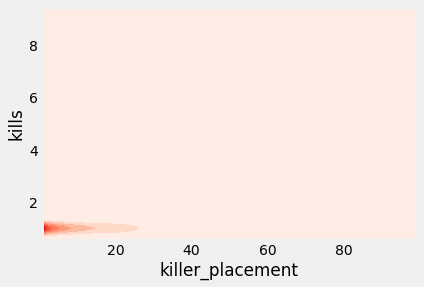

In [43]:
sns.kdeplot(kum.killer_placement, kum.kills, cmap="Reds", shade=True, bw=.15)